In [1]:
print("Hi")

Hi


#### Implement a simple CNN starting from filtering, Convolution and pooling operations and arithmetic of these with Visualization in Tensorflow.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# imports and helper plotting


def show_grid(images, titles=None, cmap='gray'):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(4*n, 3))
    if n == 1:
        axes = [axes]
    for i, img in enumerate(images):
        axes[i].imshow(img, cmap=cmap)
        if titles:
            axes[i].set_title(titles[i])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

In [4]:
# manual convolution arithmetic (NumPy)
# Define a small 6x6 toy image and a 3x3 kernel so students can compute by hand.
img = np.array([
[3, 0, 1, 2, 7, 4],
[1, 5, 8, 9, 3, 1],
[2, 7, 2, 5, 1, 3],
[0, 1, 3, 1, 7, 8],
[4, 2, 1, 6, 2, 8],
[2, 4, 5, 2, 3, 6]
], dtype=int)


kernel = np.array([
[0, 1, 2],
[2, 2, 0],
[0, 1, 2]
], dtype=int)

In [5]:
# Valid convolution implementation (no padding, stride 1)
def conv2d_valid(image, kernel):
    H, W = image.shape
    k = kernel.shape[0]
    out = np.zeros((H - k + 1, W - k + 1), dtype=int)
    for i in range(H - k + 1):
        for j in range(W - k + 1):
            patch = image[i:i+k, j:j+k]
            out[i, j] = np.sum(patch * kernel)
    return out


conv_out = conv2d_valid(img, kernel)

In [6]:
# Show the top-left patch and arithmetic so students can follow the multiplication-sum step.
patch00 = img[:3, :3]
manual_prod = patch00 * kernel
manual_sum = np.sum(manual_prod)


print('Top-left 3x3 patch:\n', patch00)
print('Kernel:\n', kernel)
print('Elementwise product:\n', manual_prod)
print('Manual sum =', manual_sum)
print('\nFull convolved output (4x4):\n', conv_out)

Top-left 3x3 patch:
 [[3 0 1]
 [1 5 8]
 [2 7 2]]
Kernel:
 [[0 1 2]
 [2 2 0]
 [0 1 2]]
Elementwise product:
 [[ 0  0  2]
 [ 2 10  0]
 [ 0  7  4]]
Manual sum = 25

Full convolved output (4x4):
 [[25 43 57 46]
 [46 49 44 40]
 [17 33 25 41]
 [33 20 37 54]]


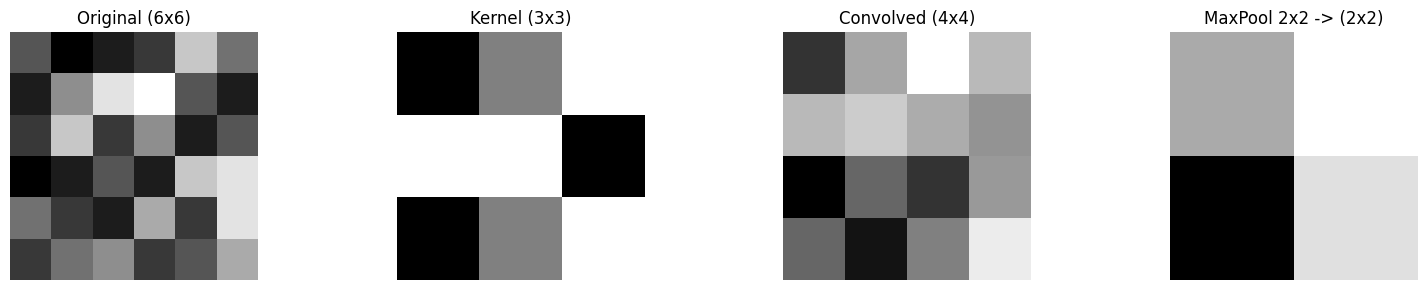

In [7]:
# 2x2 max pooling (stride 2)
def maxpool2d(image, pool=2):
    H, W = image.shape
    out = np.zeros((H // pool, W // pool), dtype=int)
    for i in range(0, H, pool):
        for j in range(0, W, pool):
            block = image[i:i+pool, j:j+pool]
            out[i//pool, j//pool] = np.max(block)
    return out


pooled = maxpool2d(conv_out, pool=2)


show_grid([img, kernel, conv_out, pooled],
['Original (6x6)', 'Kernel (3x3)', 'Convolved (4x4)', 'MaxPool 2x2 -> (2x2)'])

In [8]:

import torch
import torch.nn as nn


In [9]:
# Convert the same image to float32 and to a 4D tensor (batch, channel, H, W)
img_f = img.astype(np.float32)
x = torch.from_numpy(img_f).unsqueeze(0).unsqueeze(0) # shape (1,1,H,W)

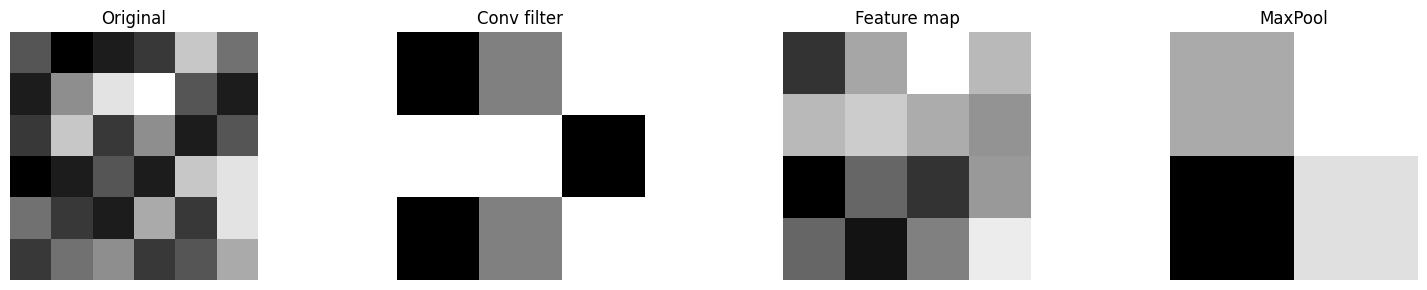

In [10]:
# Create a Conv2d with 1 input channel, 1 output channel, kernel size 3x3, no bias
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, bias=False)
# Set conv weights to our kernel (PyTorch expects shape: out_ch, in_ch, kH, kW)
kernel_t = torch.from_numpy(kernel.astype(np.float32)).unsqueeze(0).unsqueeze(0)
conv.weight.data = kernel_t


with torch.no_grad():
    out = conv(x) # perform convolution
    pooled = nn.MaxPool2d(2)(out) # 2x2 max pooling, stride=2


# Convert to numpy for visualization
orig = x.squeeze().numpy()
w = conv.weight.data.squeeze().numpy()
out_np = out.squeeze().numpy()
pooled_np = pooled.squeeze().numpy()


show_grid([orig, w, out_np, pooled_np], ['Original', 'Conv filter', 'Feature map', 'MaxPool'])

In [11]:
print('Done. Notes:')
print('- This demo uses a image to show arithmetic clearly.')
print('- You can replace the image with any grayscale image (use PIL to load).')
print('- To show multiple filters or a batch of images, expand channel/out_channels accordingly.')


Done. Notes:
- This demo uses a image to show arithmetic clearly.
- You can replace the image with any grayscale image (use PIL to load).
- To show multiple filters or a batch of images, expand channel/out_channels accordingly.
